In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("./data/preprocessed_all.dat")
df=pd.DataFrame(data)
df.head(10)


,date,YYYY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,...,day,nshor,wshor,almo,dh,winw,wspd,wdir,nsd,ssd
0,2009-12-31,2010.0,1.0,1.0,1.0,51.0,999.0,NaN,NaN,2.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-01,2010.0,1.0,1.0,18.0,51.0,999.0,NaN,NaN,2.28,...,1.0,6.0,4.0,2.0,3.0,4.0,3.0,2.0,16.0,13
2,2010-01-02,2010.0,1.0,3.0,23.0,51.0,999.0,NaN,NaN,1.96,...,2.0,7.0,4.0,2.0,2.0,3.0,2.0,17.0,14.0,999
3,2010-01-03,2010.0,1.0,3.0,18.0,51.0,999.0,NaN,NaN,1.84,...,3.0,6.0,4.0,2.0,2.0,2.0,4.0,11.0,15.0,999
4,2010-01-04,2010.0,1.0,4.0,17.0,51.0,999.0,NaN,NaN,2.15,...,4.0,6.0,3.0,2.0,2.0,2.0,4.0,11.0,14.0,999
5,2010-01-05,2010.0,1.0,6.0,1.0,21.0,999.0,NaN,NaN,4.20,...,5.0,18.0,6.0,2.0,2.0,2.0,4.0,11.0,14.0,999
6,2010-01-06,2010.0,1.0,6.0,17.0,51.0,999.0,NaN,NaN,3.47,...,6.0,15.0,4.0,2.0,2.0,2.0,3.0,13.0,14.0,999
7,2010-01-07,2010.0,1.0,7.0,17.0,21.0,999.0,NaN,NaN,3.99,...,7.0,15.0,8.0,3.0,4.0,2.0,3.0,2.0,14.0,999
8,2010-01-08,2010.0,1.0,8.0,17.0,21.0,999.0,NaN,NaN,3.51,...,8.0,15.0,6.0,3.0,3.0,2.0,2.0,17.0,15.0,999
9,2010-01-09,2010.0,1.0,9.0,17.0,21.0,999.0,NaN,NaN,2.46,...,9.0,10.0,5.0,2.0,2.0,4.0,4.0,11.0,16.0,999


In [2]:
#exploring null values in data
df.isnull().sum()

date         0
YYYY        74
MM          74
DD          74
hh          74
mm          74
WDIR        74
WSPD      2560
GST       2560
WVHT        76
DPD         76
APD         76
MWD         74
PRES        74
ATMP        74
WTMP        74
DEWP        74
VIS       2560
TIDE      2560
date.1      74
year         3
month        3
day          3
nshor        3
wshor        3
almo         3
dh           3
winw         3
wspd         3
wdir         3
nsd          3
ssd          3
dtype: int64

# Removing columns which have all rows as null values 
# Removing observations which do not have day month year

In [3]:
df=df.drop(['VIS', 'TIDE','GST','WSPD'], axis=1)
df = df[df['year'].notna()]
# since the data is merged on date we can remove 
ddate=df.date
df=df.drop(['YYYY', 'MM','DD','date.1','date'], axis=1)
df.isnull().sum()
#for now remove rows with ATMP =null
df = df[df['ATMP'].notna()]
df.WVHT=np.where(df.WVHT.isnull(),df['WVHT'].mean(),df['WVHT'])
df.DPD=np.where(df.DPD.isnull(),df['DPD'].mean(),df['DPD'])
df.APD=np.where(df.APD.isnull(),df['APD'].mean(),df['APD'])


df.isnull().sum()

hh       0
mm       0
WDIR     0
WVHT     0
DPD      0
APD      0
MWD      0
PRES     0
ATMP     0
WTMP     0
DEWP     0
year     0
month    0
day      0
nshor    0
wshor    0
almo     0
dh       0
winw     0
wspd     0
wdir     0
nsd      0
ssd      0
dtype: int64

In [4]:
#understanding target column
df['nshor'].describe()

count    2483.000000
mean        4.732179
std         4.227271
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        35.000000
Name: nshor, dtype: float64

In [5]:
# medianV = df1.loc[df1['VacSignal']<500, 'VacSignal'].median()
# medianO = df1.loc[df1['OccMinor']<df1['OccMinor'].quantile(q=0.90), 'OccMinor'].median()
# df1['VacSignal'] = df1['VacSignal'].mask(df1['VacSignal'] >500, medianV)

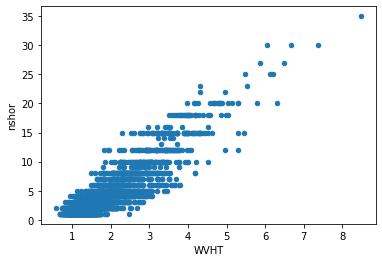

In [6]:
#Scatter plots between 'nshor' and correlated variable WVHT . The plot shows good co relation  
data1 = pd.concat([df['nshor'], df['WVHT']], axis=1)
data1.plot.scatter(x='WVHT', y='nshor');


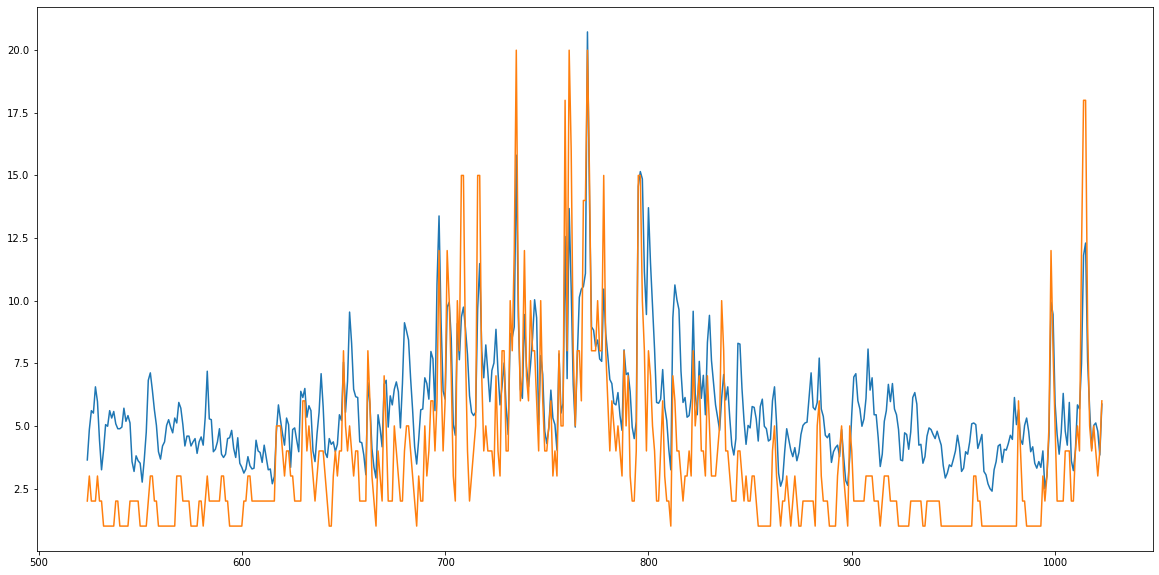

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

test_WVHT = df['WVHT'][500:1000] * 3.28 # NB Converted Meters to Feet
test_nshor = df['nshor'][500:1000]
plt.plot(test_WVHT) # Convert meters to feet
plt.plot(test_nshor) # Observations are half actual face height


In [8]:
#removing outliers by filtering 90 percentiles for WVHT and nshor
df = df.drop(df[(df['WVHT']>df['WVHT'].quantile(q=0.90)) & (df['nshor']<df['nshor'].quantile(q=0.90))].index)

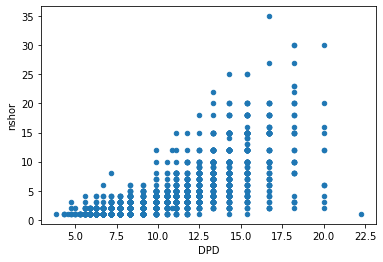

In [9]:
#Scatter plots between 'nshor' and correlated variable DPD 
data2 = pd.concat([df['nshor'], df['DPD']], axis=1)
data2.plot.scatter(x='DPD', y='nshor');


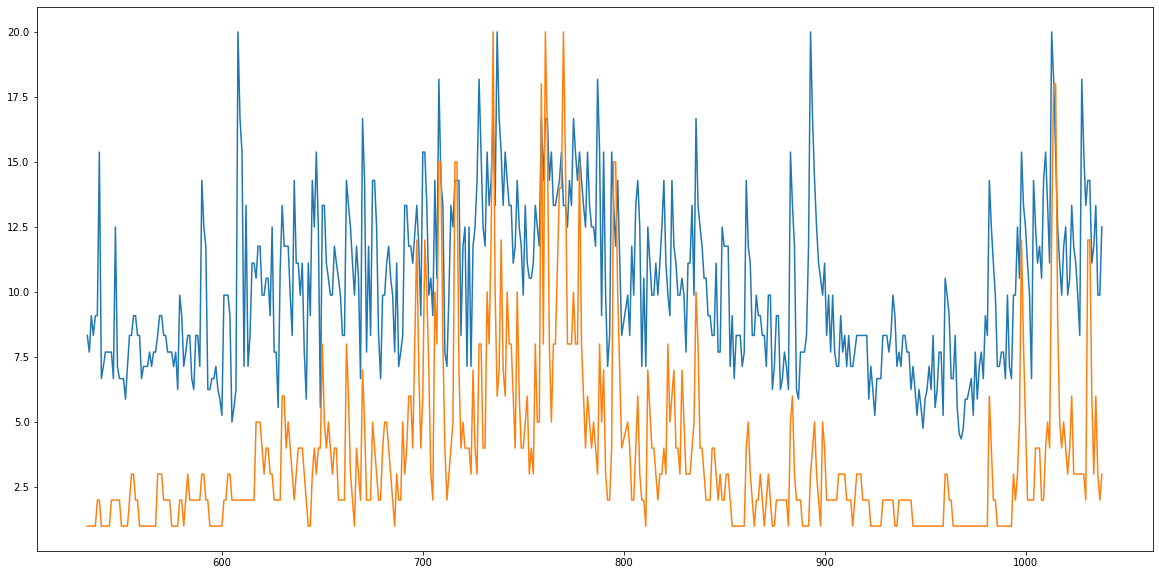

In [10]:
plt.figure(figsize=(20,10))

test_WVHT = df['DPD'][500:1000] # NB Converted Meters to Feet
test_nshor = df['nshor'][500:1000]
plt.plot(test_WVHT) # Convert meters to feet
plt.plot(test_nshor) # Observations are half actual face height

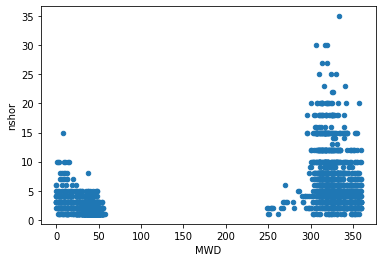

In [11]:
#Scatter plots between 'nshor' and  variable MWD. We can see that the data points are at extreme ends . Lets explore this more 
data3 = pd.concat([df['nshor'], df['MWD']], axis=1)
data3.plot.scatter(x='MWD', y='nshor');


In [12]:
#counting number of observations for each direction , utlizing feature MWD
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

df_dir = pd.DataFrame(data=df.nshor)
df_dir["north"]=""
df_dir["east"]=""
df_dir["south"]=""
df_dir["west"]=""
# for ind in df.index:
#      print(df['Name'][ind], df['Stream'][ind])
for index, row in df.iterrows():
    if row['MWD']<90:
        df_dir["north"][index]=1
    else:
        df_dir["north"][index]=0
    if row['MWD']>=90 and row['MWD']<180:
        df_dir["east"][index]=1
    else:
        df_dir["east"][index]=0 
    if row['MWD']>=180 and row['MWD']<270:
        df_dir["south"][index]=1
    else:
        df_dir["south"][index]=0  
    if row['MWD']>=270 and row['MWD']<360:
        df_dir["west"][index]=1
        
    else:
        df_dir["west"][index]=0    

Text(0, 0.5, 'observation numbers for wind')

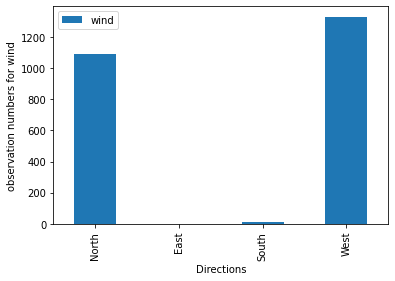

In [13]:
#plotting bar graph to see wind directions . From the observation below we see that wind direction is west or north . 
plotdata = pd.DataFrame({
"wind":[(df_dir.north ==1).sum(),(df_dir.east ==1).sum(),(df_dir.south ==1).sum(),(df_dir.west ==1).sum()]
    
    }, 
    index=["North", "East", "South", "West"]
)
plotdata.plot(kind="bar")

plt.xlabel("Directions")
plt.ylabel("observation numbers for wind")

In [14]:

#understanding nshore as per wind direction , we will query nshore values corresponding to each direction
#the results below for each north south east west query show that nshore shows lasger values when wind blows from north or west direction
df_new = df_dir.query("north==1")
df_new['nshor'].describe()


count    1091.000000
mean        2.207149
std         1.426867
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: nshor, dtype: float64

In [15]:
df_new = df_dir.query("east==1")
df_new['nshor'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: nshor, dtype: float64

In [16]:
df_new = df_dir.query("south==1")
df_new['nshor'].describe()

count    13.000000
mean      1.923077
std       0.640513
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: nshor, dtype: float64

In [17]:
df_new = df_dir.query("north==1")
df_new['nshor'].describe()

count    1091.000000
mean        2.207149
std         1.426867
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: nshor, dtype: float64

In [18]:
#cleaning data of special characters for variable ssd
df['ssd'] = df['ssd'].str.replace('\W', '')

df["ssd"] = df.ssd.astype(float)
# df["north"] = df.ssd.astype(float)
# df["south"] = df.ssd.astype(float)
# df["east"] = df.ssd.astype(float)
# df["west"] = df.ssd.astype(float)

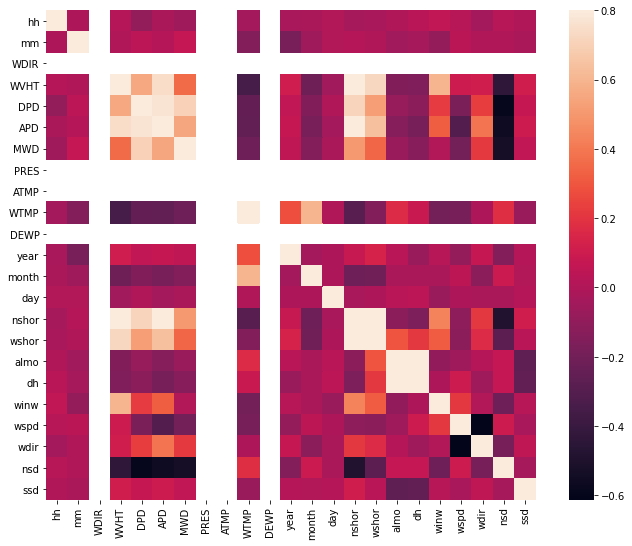

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# the heat map below shows high colinearity between PRES and ATMP. DEWP and WDIR. PRES and WDIR . ATMP and WDIR. 
 

In [20]:
#on exploring these variables more we realise that they have constant value . 
print("unique value in ", "PRES=",len(pd.unique(df['PRES'])))
print("unique value in ", "ATMP=",len(pd.unique(df['ATMP'])))
print("unique value in ", "WDIR=",len(pd.unique(df['WDIR'])))
print("unique value in ", "DEWP=",len(pd.unique(df['DEWP'])))

unique value in  PRES= 1
unique value in  ATMP= 1
unique value in  WDIR= 1
unique value in  DEWP= 1


In [21]:
#since the above variables do not add value to regression we will drop these
df=df.drop(['PRES', 'ATMP','WDIR','DEWP'], axis=1)

In [22]:
#checking variable type
df.dtypes

hh       float64
mm       float64
WVHT     float64
DPD      float64
APD      float64
MWD      float64
WTMP     float64
year     float64
month    float64
day      float64
nshor    float64
wshor    float64
almo     float64
dh       float64
winw     float64
wspd     float64
wdir     float64
nsd      float64
ssd      float64
dtype: object

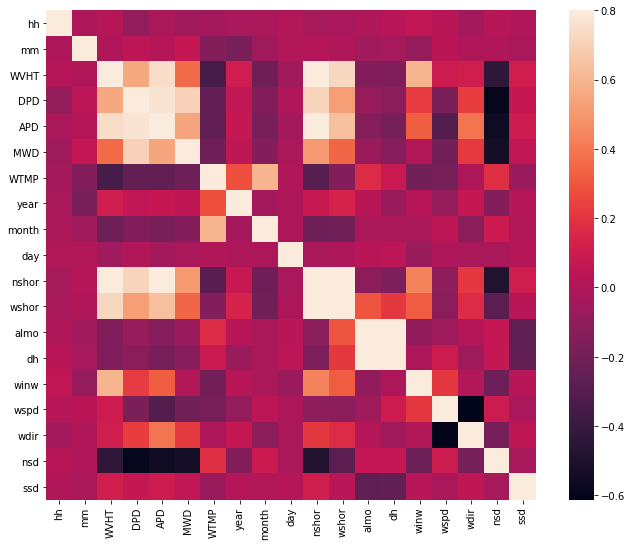

In [23]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#plotting heatmap again after dropping multicolinear variables. We can see that features WVHT, DPD ,APD have strong corelation with nshor

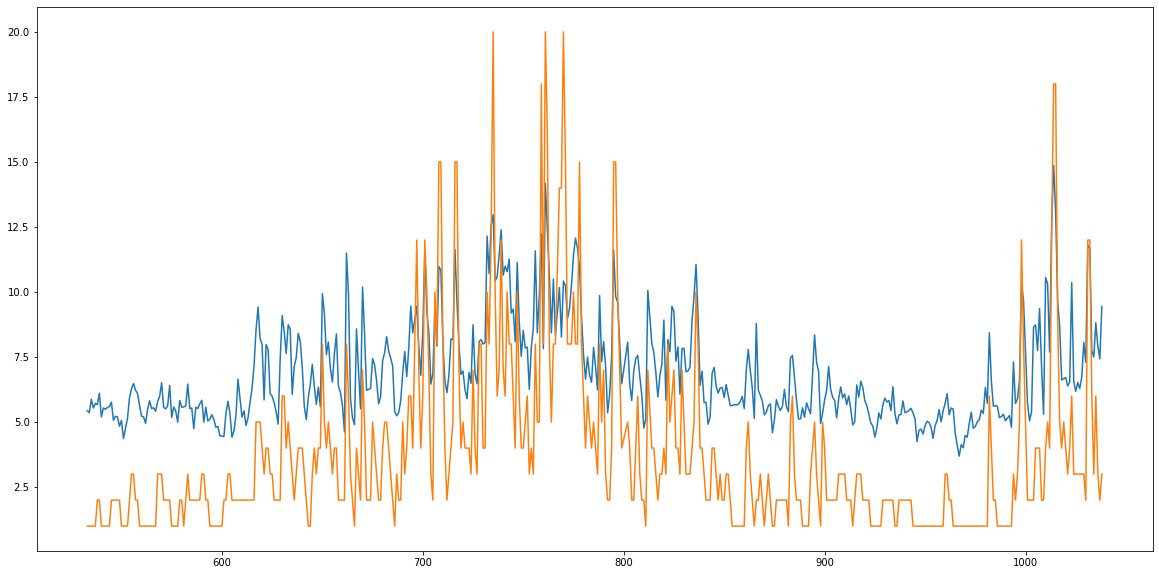

In [24]:
#plotting graph for APD. we can see with increase in average wave period , nshore increases 
plt.figure(figsize=(20,10))

test_WVHT = df['APD'][500:1000] # NB Converted Meters to Feet
test_nshor = df['nshor'][500:1000]
plt.plot(test_WVHT) # Convert meters to feet
plt.plot(test_nshor)

In [25]:
# measuring the skewness of data . if the skewness is less than -1 or greater than 1, the data are highly skewed.
from scipy.stats import skew,norm
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
ssd,36.490008
wshor,2.911201
winw,2.439011
nshor,2.085377
WVHT,1.786858
wdir,1.709243
almo,1.550134
dh,1.536246
APD,0.914860
nsd,0.900217



 mu = 4.69 and sigma = 4.25



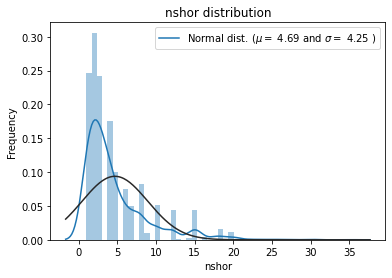

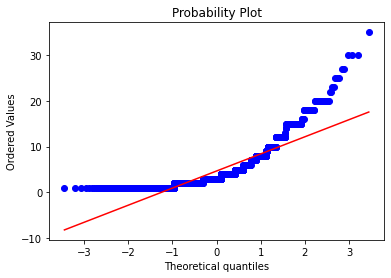

In [26]:
#import seaborn as sns
#  target variable is right skewed. It shows positive skewness and does not follow the diagonal line.
from scipy import stats
sns.distplot(df['nshor'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['nshor'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('nshor distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['nshor'], plot=plt)
plt.show()

In [27]:

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 19 skewed numerical features to Box Cox transform



 mu = 1.75 and sigma = 0.80



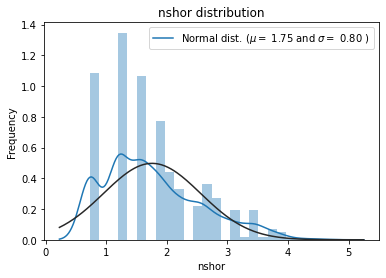

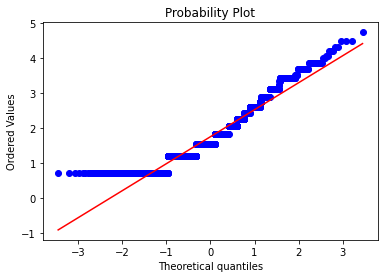

In [28]:
# plotting target variable again after making it more normally distributed.
sns.distplot(df['nshor'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['nshor'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('nshor distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['nshor'], plot=plt)
plt.show()

In [29]:
# from sklearn.model_selection import train_test_split

# X=df.drop(['nshor'], axis = 1)
# X=df[['WVHT','DPD','APD','MWD','nsd']]
# Y=df.nshor
# X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=0)

In [30]:
#splitting the data into test train
from sklearn.model_selection import train_test_split

X=df.drop(['nshor'], axis = 1)
X=df[['WVHT','DPD','APD','MWD','nsd','WTMP','wshor']]
Y=df.nshor
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=0)

In [31]:
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#utilizing gridsearch cv to find best hyperparameters . I have commented this pard because this takes long computation time

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        "reg_alpha": [0, 0.5, 1],
        "reg_lambda": [1, 1.5, 2, 3, 4.5]
    }

xgb_model = XGBRegressor()

# gsearch = GridSearchCV(estimator = xgb_model,
#                            param_grid = param_tuning,                        
#                            #scoring = 'neg_mean_absolute_error', #MAE
#                            #scoring = 'neg_mean_squared_error',  #MSE
#                            cv = 5,
#                            n_jobs = -1,
#                            verbose = 1)

# gsearch.fit(X_train,y_train)

# print(gsearch.best_params_)



In [32]:
from sklearn.metrics import mean_squared_error
xgb_model = XGBRegressor(
         objective = 'reg:squarederror',
         colsample_bytree = 0.7,
         learning_rate = 0.1,
         max_depth = 3,
         min_child_weight = 3,
         n_estimators = 100,
         subsample = 0.5,
         reg_alpha= 1,reg_lambda=1)
%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb=np.around(y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
#finding mean absolute error 
print("MAE: ", mae_xgb)
m_s_e=mean_squared_error(y_test, y_pred_xgb)
print("RMSE",np.sqrt(m_s_e))

CPU times: user 255 ms, sys: 9.92 ms, total: 265 ms
Wall time: 82.3 ms
MAE:  0.2990656473078118
RMSE 0.346947346548072
